# Many-objective

In [1]:
import matplotlib.pyplot as plt
from pymoo.optimize import minimize
from pymoode.algorithms import NSDER
from pymoode.algorithms import GDE3
from pymoode.survival import RankAndCrowding
from pymoo.util.ref_dirs import get_reference_directions

In [2]:
from pymoo.problems import get_problem

problem = get_problem("dtlz2")

In [3]:
NGEN = 150
POPSIZE = 136
SEED = 5

In [4]:
gde3 = GDE3(
    pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.2, F=(0.0, 1.0), gamma=1e-4,
    survival=RankAndCrowding(crowding_func="mnn"),
)

res_gde3 = minimize(
    problem,
    gde3,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

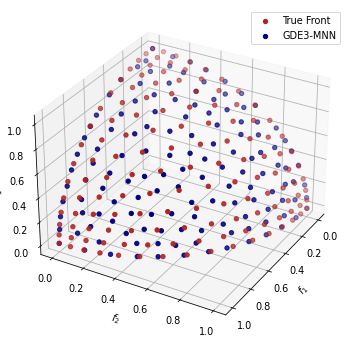

In [5]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=70, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], res_gde3.F[:, 2],
        color="navy", label="GDE3-MNN", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()

In [6]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=15)

nsder = NSDER(ref_dirs=ref_dirs, pop_size=POPSIZE,
              variant="DE/rand/1/bin", CR=0.5, F=(0.0, 1.0), gamma=1e-4,
)
    
res_nsder = minimize(
    problem,
    nsder,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

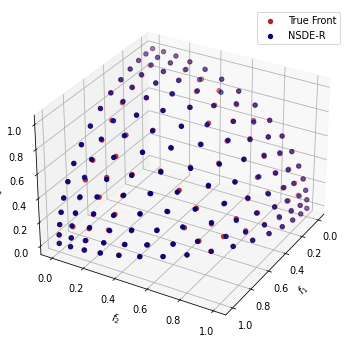

In [7]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=70, subplot_kw={'projection':'3d'})

ax.scatter(problem.pareto_front()[:, 0], problem.pareto_front()[:, 1], problem.pareto_front()[:, 2],
        color="firebrick", label="True Front", marker="o")

ax.scatter(res_nsder.F[:, 0], res_nsder.F[:, 1], res_nsder.F[:, 2],
        color="navy", label="NSDE-R", marker="o")

ax.view_init(elev=30, azim=30)

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.set_zlabel("$f_3$")
ax.legend()
fig.tight_layout()